In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('book_df_final.csv')

In [ ]:
df.head(2)

,Unnamed: 0,pages,rating,reviews,totalratings,bookformat_Audio,bookformat_Audio CD,bookformat_Audio Cassette,bookformat_Audiobook,bookformat_Board book,...,10758,10759,10760,10761,10762,10763,10764,10765,10766,10767
0,0,512,3.82,110,2051,False,False,False,False,False,...,0.000033,0.000000,0.000067,0.000000,0.000033,0.000000,0.000033,0.000000,0.000033,0.000100
1,1,306,4.02,552,6147,False,False,False,False,False,...,0.002767,0.003867,0.004433,0.011067,0.012900,0.020333,0.001367,0.003333,0.000033,0.000467


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df.head(1)

,pages,rating,reviews,totalratings,bookformat_Audio,bookformat_Audio CD,bookformat_Audio Cassette,bookformat_Audiobook,bookformat_Board book,bookformat_Hard Cover,...,10758,10759,10760,10761,10762,10763,10764,10765,10766,10767
0,512,3.82,110,2051,False,False,False,False,False,False,...,0.000033,0.0,0.000067,0.0,0.000033,0.0,0.000033,0.0,0.000033,0.0001


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df.drop(['rating'], axis=1)
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardize the features (optional but can be beneficial for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# You can adjust hyperparameters like max_depth, min_samples_split, etc.
dt_model = DecisionTreeRegressor(max_depth = 5, random_state = 42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.05121477864800593
R-squared: 0.1855482811043503


Top Ten Feature ranking:
1. reviews: 0.3944847317801112
2. totalratings: 0.28789697140292997
3. pages: 0.1263588869105606
4. bookformat_ebook: 0.023609381889211082
5. bookformat_Hardcover: 0.020578325085037055
6. 8827: 0.016802405079651056
7. 5624: 0.01508166374431922
8. 5544: 0.01496335913788779
9. 2046: 0.01325365284809438
10. 2977: 0.013138203850457804


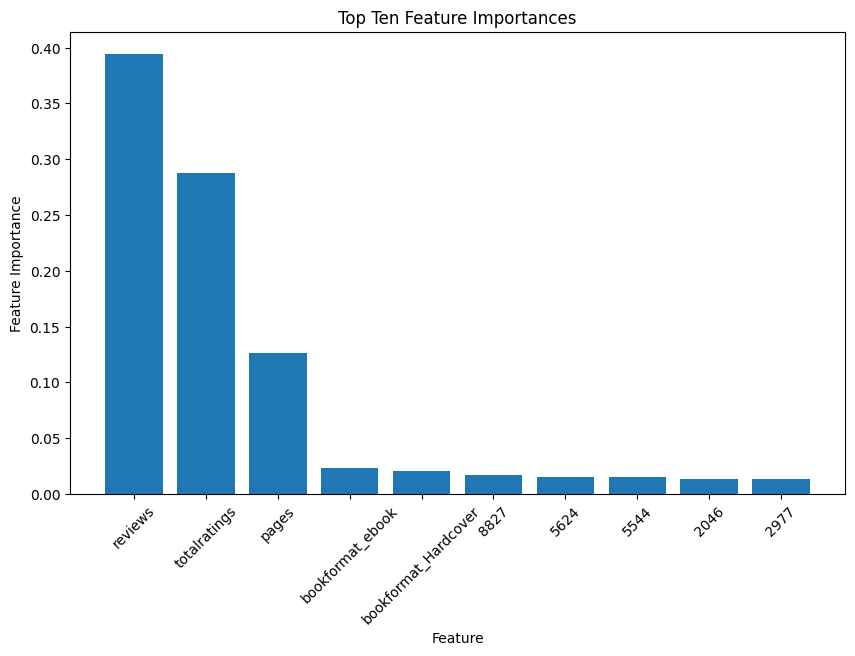

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances and feature names
feature_importances = dt_model.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Print top ten feature ranking
print("Top Ten Feature ranking:")
for f in range(10):
    print(f"{f + 1}. {feature_names[indices[f]]}: {feature_importances[indices[f]]}")

# Plot top ten feature importances
plt.figure(figsize=(10, 6))
plt.title("Top Ten Feature Importances")
plt.bar(range(10), feature_importances[indices][:10], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# You can adjust hyperparameters like n_estimators, max_depth, min_samples_split, etc.
rf_model = RandomForestRegressor(n_estimators = 20, max_depth = 10, random_state = 42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.04855814247664536
R-squared: 0.22779588918474214


Top Ten Feature ranking:
1. reviews: 0.1627928495207269
2. totalratings: 0.11363105906147536
3. pages: 0.01727491021345764
4. bookformat_Hardcover: 0.013911302987469367
5. 10699: 0.0021450526397106787
6. 4499: 0.0016118206435827953
7. 1137: 0.0016118016429895862
8. 8147: 0.001558411050346018
9. 6544: 0.0014945957431448582
10. 10714: 0.001453342018276462


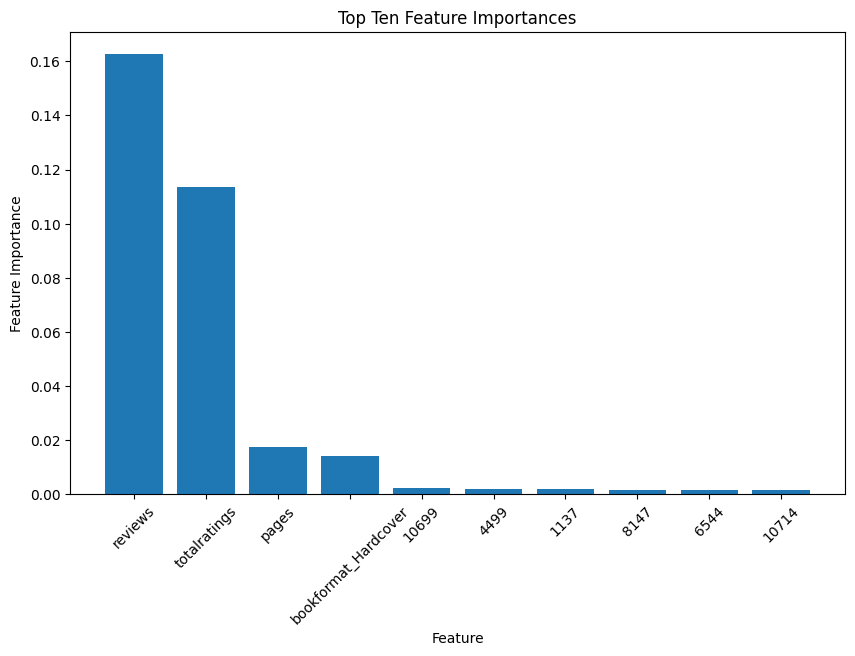

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances and feature names
feature_importances = rf_model.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Print top ten feature ranking
print("Top Ten Feature ranking:")
for f in range(10):
    print(f"{f + 1}. {feature_names[indices[f]]}: {feature_importances[indices[f]]}")

# Plot top ten feature importances
plt.figure(figsize=(10, 6))
plt.title("Top Ten Feature Importances")
plt.bar(range(10), feature_importances[indices][:10], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators = 20, learning_rate = 0.1, random_state = 42)


# Train the model
gb_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.04807667800243955
R-squared: 0.2354524597871297


Top Ten Feature ranking:
1. reviews: 0.4445264846394598
2. totalratings: 0.2518854887087741
3. pages: 0.07148369946939254
4. bookformat_Hardcover: 0.02754643501461727
5. 10714: 0.011054235942260968
6. 10323: 0.00907368410616582
7. 10121: 0.005819602470193173
8. 1262: 0.005316989068686184
9. 620: 0.005305112029788122
10. 784: 0.005289058830967746


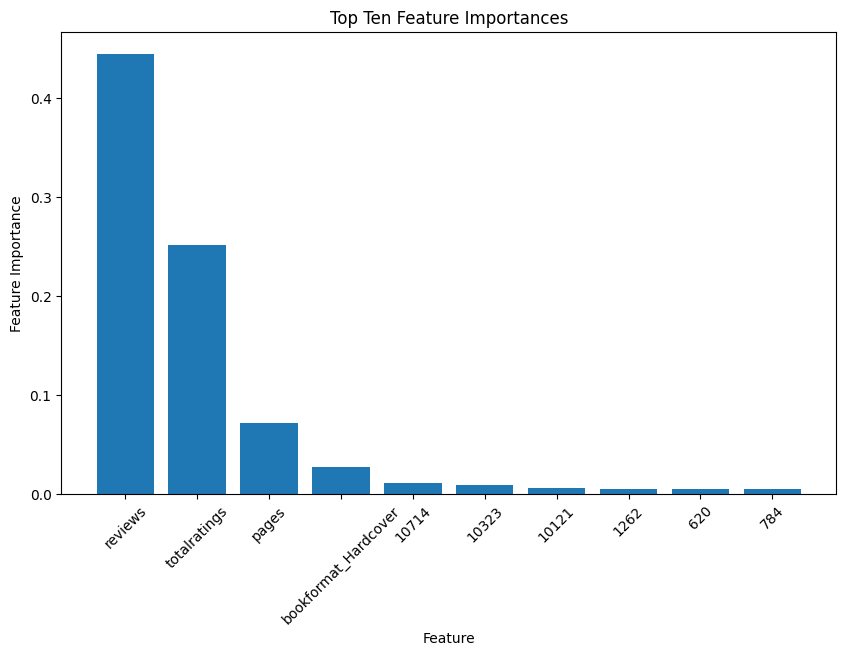

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances and feature names
feature_importances = gb_regressor.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Print top ten feature ranking
print("Top Ten Feature ranking:")
for f in range(10):
    print(f"{f + 1}. {feature_names[indices[f]]}: {feature_importances[indices[f]]}")

# Plot top ten feature importances
plt.figure(figsize=(10, 6))
plt.title("Top Ten Feature Importances")
plt.bar(range(10), feature_importances[indices][:10], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()